# Models of Decision Making

- Please work in groups of two or more and **help your group members**.

- Commit and show an instructor your work before leaving.

In [117]:
# Run this cell first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pip install ipywidgets -q
import ipywidgets as widgets

from tools import *

Note: you may need to restart the kernel to use updated packages.


### Decision Making Under Uncertainty

Most of the decisions that people make every day involve **uncertain outcomes**. Decisions of this kind are referred to as **decisions under risk**. 

For example, making the decision to do an unpaid internship could pay off in that it could lead to a paid position, but there are no guarantees, and you could end up wasting time in the end.

- **EXERCISE:** Discuss with your group which option you would choose. Explain your reasoning. Do you think there's an objective, right answer?

What kind of mathematical model could account for how people make such decisions?

To explore this question, let's start with a kind of decision problem format commonly employed by psychologists, consisting of two options A and B:

| Option A | Option B |
|-|-|
| <span style="color:blue">70%</span> chance of <span style="color:green">$100</span> <br> <span style="color:blue">30%</span> chance of <span style="color:green">$20</span> | <span style="color:blue">40%</span> chance of <span style="color:green">$180</span> <br> <span style="color:blue">60%</span> chance of <span style="color:green">$40</span> |

Each of the options above is called a **gamble**. You can choose either **gamble A** or **gamble B**. The outcomes of each are **uncertain**. For example, if you choose gamble A, you are most likely (70%) to win $100, but could also win much less (i.e., $20 with a 30% chance). If you choose gamble B, the possible outcomes and their probabilities are different.

If you pick gamble A, you have a pretty good chance of winning a relatively "big" reward, but if you pick gamble B and get lucky, you could end up with more money overall.

Simplified scenarios like these help psychologists measure how people reason about options with uncertain outcomes. Just like accepting an unpaid internship, the outcome of the gamble we choose above is uncertain.

- **EXERCISE:** Discuss with your group which option you would choose. Explain your reasoning. Do you think there's an objective, best choice?

You and your group members could pick the same gamble and still end up with a different outcome. Let's simulate the outcomes of making such choices. The `np.random.choice` function takes in a list of items (outcomes in our case) and a list of corresponding probabilities, and randomly samples an item according to those probabilities. For example, to sample an outcome from gamble A, we can write:

In [118]:
np.random.choice([100., 20.], p=[0.7, 0.3])

np.float64(100.0)

We can also sample multiple times and see how the results vary:

In [119]:
for i in range(10):
    print(np.random.choice([100., 20.], p=[0.7, 0.3]))

100.0
100.0
20.0
100.0
20.0
100.0
100.0
100.0
20.0
100.0


- **EXERCISE:** Create a function called `simulate_an_outcome_of_a_choice` that takes in a choice of gamble as a string (either `'A'` or `'B'`) and outputs a single (random) outcome from the chosen gamble using `np.random.choice`.

In [120]:
# Your code here

def simulate_an_outcome_of_a_choice(gamble: str) -> str:
    if gamble == 'A':
        return np.random.choice([100., 20.], p=[0.7, 0.3])
    else:
        return np.random.choice([180., 40.], p=[0.4, 0.6])

In [121]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if simulate_an_outcome_of_a_choice('A') in [100., 20.]:
    print('Test passed')
else:
    print('Test failed')

Test passed


Given the uncertainty involved, which gamble are people more likely to pick, and why?

Let's think about Marr's computational level of analysis. What problem are people solving when they make such decisions?

Intuitively, it makes a lot of sense that people would want to make the decisions that maximize good outcomes. In this particular context, this means **maximizing earnings** (i.e., more money is better than less money).

- **EXERCISE:** Run the cell below to run a choice experiment. On each trial, you'll be shown the same pair of gambles and can pick one or the other by clicking a button. After making your choice, you'll be shown the outcome of that choice. At the end of the experiment, you'll see your total earnings. **Compare your total earnings with your partner.** Who made more money? Was it because of your choices or was it by chance? 

In [122]:
experiment = ChoiceExperiment()
experiment.run()

Output()

How can we maximize earnings if we don't know with certainty what the outcomes of our decisions will be?

We don't know what the outcome of a particular choice will be, **but** we can simulate what the outcome will be **on average**.

Let's see what such an average would look like.

- **EXERCISE:** Use a loop and your `simulate_an_outcome_of_a_choice` function to simulate the outcomes of choosing gamble A 1000 times. Store the number of times the outcome is $100 (rather than $20) in a variable called `number_of_100s`. Store the average outcome in a variable called `average_outcome`.

In [123]:
# don't change
np.random.seed(0)

# Your code here
number_of_100s = 0
outcome = 0

for _ in range(1000):
    result = simulate_an_outcome_of_a_choice('A')
    if result == 100:
        number_of_100s += 1
    outcome += result

average_outcome = outcome/1000
print(average_outcome)
print(number_of_100s)

76.72
709


In [124]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(average_outcome, 70.0, atol=10) and np.isclose(number_of_100s, 700.0, atol=10):
    print('Test passed')
else:
    print('Test failed')

Test passed


Let's see the results:

In [125]:
print('Average outcome:', average_outcome)
print('Number of 100s:', number_of_100s)

Average outcome: 76.72
Number of 100s: 709


On average, we made $76.72.

The number of times we won $100 was 709. That's 709 / 1000 choices = 70.9%. This is approximately what we'd expect given that, in gamble A, $100 is awarded with 70% probability.

Thus, we can directly compute what we'd make on average in the long run for gamble A as ($100 * 0.7) + ($20 * 0.3) = $76.

This quantity is called the **expected value** of gamble A and is defined as: $$V(A) = \sum_{x_i\in A} x_i p_i,$$ where each pair $(x_i, p_i)$ is an outcome and its probability from gamble A. We compute and sum these products for all outcomes in $A$.

Let's compute this value for each gamble.

First, we load the outcomes and probabilities for the two gambles into the numpy arrays below. Gamble A is fully described by arrays `A_outcomes` (100 and 20) and `A_probs` (.7 and .3). The same is true for B.

Recall where these values come from:

| Option A | Option B |
|-|-|
| <span style="color:blue">70%</span> chance of <span style="color:green">$100</span> <br> <span style="color:blue">30%</span> chance of <span style="color:green">$20</span> | <span style="color:blue">40%</span> chance of <span style="color:green">$180</span> <br> <span style="color:blue">60%</span> chance of <span style="color:green">$40</span> |

In [126]:
A_outcomes = np.array([100., 20.])
A_probs = np.array([0.7, 0.3])

B_outcomes = np.array([180., 40.])
B_probs = np.array([0.4, 0.6])

- **EXERCISE:** Create a function called `compute_expected_value` that takes an array of outcomes from a single gamble and an array of probabilities from a single gamble and returns the expected value of that single gamble.

In [127]:
# Your code here

def compute_expected_value(outcomes, probs):
    return np.sum(np.multiply(outcomes, probs))

In [128]:
# TEST YOUR SOLUTION

if np.isclose(compute_expected_value(A_outcomes, A_probs), 76.0):
    print('Test passed')
else:
    print('Test failed')

Test passed


- **EXERCISE:** Compute the expected value of gamble A and store the result in `V_A`. Do the same for B and store in `V_B`.

In [129]:
# Your code here
V_A = compute_expected_value(A_outcomes, A_probs)
V_B = compute_expected_value(B_outcomes, B_probs)


# don't change
print(f"V_A: {V_A}")
print(f"V_B: {V_B}")

V_A: 76.0
V_B: 96.0


In [130]:
# TEST YOUR SOLUTION

if np.isclose(V_A, 76.0) and np.isclose(V_B, 96.0):
    print('Test passed')
else:
    print('Test failed')

Test passed


Going back to Marr, if we think that the problem people are solving is the problem of maximizing average monetary outcomes, then a cognitive model that solves this problem is:

$$\text{behavior (choose A or not)} = \text{decide}(A, B) = \begin{cases}
1 & \text{if } V(A) > V(B), \\
0 & \text{if } V(B) > V(A), \\
0.5 & \text{if } V(A) = V(B)
 \end{cases}$$

That is, we choose A if it pays out more than B on average in the long run. If the opposite is true, we choose B. If they pay out exactly the same on average, then we are indifferent to which is chosen (represented here as "0.5").

Analyzing how people might rationally solve a problem is called **rational analysis**. Models that make solve problems rationally are called **rational models**.

- **EXERCISE:** Implement the rational cognitive model above. Create a function called `decide_between_A_and_B` that takes as input `V_A` and `V_B` and outputs a decision as a string for convenience (either `'A'`, `'B'`, or `'Indifferent'`).

In [131]:
# Your code here

def decide_between_A_and_B(v_a, v_b):
    if v_a > v_b: return 'A'
    elif v_b > v_a: return 'B'
    else: return 'Indifferent'

In [132]:
# TEST YOUR SOLUTION

if decide_between_A_and_B(V_A, V_B) == 'B':
    print('Test passed')
else:
    print('Test failed')

Test passed


Based on this model, we should choose gamble B, because it pays out more than A on average ($96 vs $76).

- **EXERCISE:** Confirm this below using `decide_between_A_and_B`. Store the result in a variable called `choice`.

In [133]:
# Your code here

choice = decide_between_A_and_B(V_A, V_B)

# don't change
choice

'B'

In [134]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if choice == 'B':
    print('Test passed')
else:
    print('Test failed')

Test passed


The above model is surprisingly effective and explains many human decisions.

However, let's look at another choice problem:

| Gamble A | Gamble B |
|-|-|
| <span style="color:blue">50%</span> chance of <span style="color:green">$1,000</span> <br> <span style="color:blue">50%</span> chance of <span style="color:green">$0</span> | <span style="color:blue">100%</span> chance of <span style="color:green">$450</span> |

In behavioral experiments, **the majority of the participants usually choose gamble B**.

Let's see if this choice makes sense under our model.

Again, we'll represent the decision problem using numpy arrays.

- **EXERCISE:** Fill in the blanks.

In [135]:
# Fill in the blanks

A2_outcomes = np.array([1000, 0.])
A2_probs = np.array([0.5, 0.5])

B2_outcomes = np.array([450.])
B2_probs = np.array([1.0])

In [136]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(compute_expected_value(A2_outcomes, A2_probs), 500.0) and np.isclose(compute_expected_value(B2_outcomes, B2_probs), 450.0):
    print('Test passed')
else:
    print('Test failed')

Test passed


Let's look at the expected values of each gamble.

- **EXERCISE:** Fill in the blanks.

In [137]:
# Fill in the blanks

V_A2 = compute_expected_value(A2_outcomes, A2_probs)
V_B2 = compute_expected_value(B2_outcomes, B2_probs)

print(f"V_A: {V_A2}")
print(f"V_B: {V_B2}")

V_A: 500.0
V_B: 450.0


In [138]:
# TEST YOUR SOLUTION
if np.isclose(V_A2, 500.0) and np.isclose(V_B2, 450.0):
    print('Test passed')
else:
    print('Test failed')

Test passed


**The expected value model predicts that people will choose gamble A** because it has a higher expected value (500 vs 450). 

However, as we mentioned before, **most participants choose gamble B rather than gamble A!**

Empirical choices made by people that violate what is expected by a rational theory are called **choice anomalies**.

Why do people choose gamble B if its EV is lower? That is, why seemingly choose $450 over $500? A popular theory of why this happens has to do with how the mind treats quanitities of money.

### From money to utility

Imagine you were walking along and found $500 on the street. You'd feel pretty happy. Now, let's say that 10 minutes later, you found another $500. You'd now have exactly twice as much money (i.e., you went from $500 to $1,000), but would you feel exactly twice as happy? You'd definitely feel happier, but perhaps not twice as much. Why not? Going from having no extra spending money to now having an extra $500 is a big deal, whereas going from $500 to $1000 would be somewhat less of a shock. In the same way, a million dollars is much more valuable to someone who makes $30,000/year than to someone who's already a millionaire.

This provides a possible explanation for why people choose gamble B. The "second half" of the $1000 is worth much less "happiness" than the first half, and so the total happiness is not 2 * happiness_from(500); it's less. This makes $1000 seem less appealing than it would be if it were worth 2 * happiness_from(500), rather than less.

Thus, what's perhaps more important to us is not the raw monetary values but the "happiness points" associated with them. We can think of these points as representing the **psychological value of money**, which is often referred to as **utility**. How does exactly does utility relate to money?

Our discussion of "happiness" above implies that more utility is obtained by an increase from say $1 to $2 than is obtained by an increase from say $1,001 to $1,002. Both are an increase of $1, but the first is psychologically more valuable. The general pattern we are describing here is that the value of each consecutive dollar **decreases** over the previous dollar.

We can describe this relationship using a curve that looks something like the one below. In particular, larger amounts of money *always* provide more utility, as we'd expect, but they also increase utility at a decreasing rate. For example, the curve implies that utility increases rapidly from $0 to $200, but only slowly from $800 to $1,000. This is phenomenon is called the **diminishing marginal utility** of money.

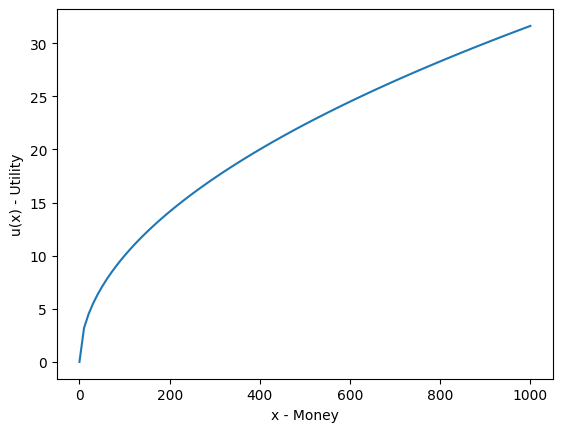

In [139]:
plot_utility_curve()

If this seems familiar, it should! It's not unlike Fechner's law, a kind of psychophysics for money. We are mapping the objective value of money to a psychological variable called utility, just like we mapped grams to log(grams).

However, the curve need not neccessarily be a logarithmic function. In fact, it's more common to use a power function, which is the function plotted above. Given some monetary value $x$ (e.g., $5), the utility of $x$ can be written as $u(x) = x^\alpha$, where $\alpha$ is a parameter that determines the shape of the utility function.

- **EXERCISE:** Create a function called `power_function` that takes an outcome `x` and a parameter `alpha` as input and returns $u(x)$ as output.

In [140]:
# Your code here

def power_function(x, alpha):
    return x ** alpha

In [141]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(power_function(0.5, 0.5), 0.7071067811865476):
    print('Test passed')
else:
    print('Test failed')

Test passed


Observe below that when $\alpha = 1$, the function is linear, and utility = money.

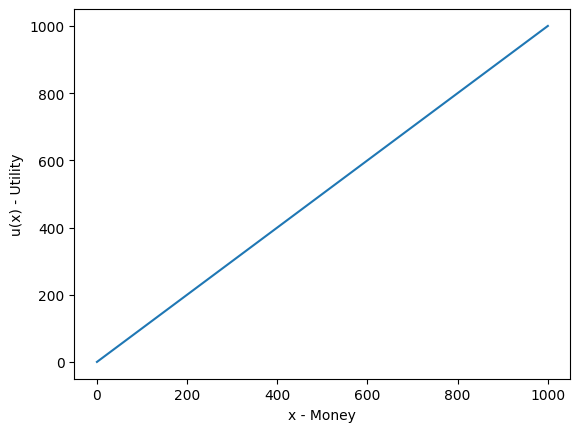

In [142]:
plot_utility_curve(alpha=1)

When $\alpha < 1$, the function becomes nonlinear, and we see the familiar the diminishing marginal utility of money:

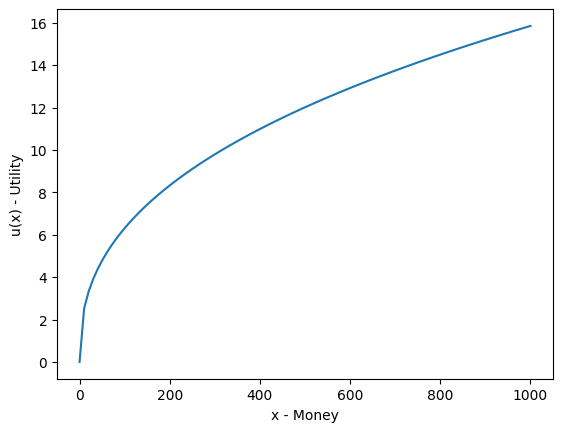

In [143]:
plot_utility_curve(alpha=0.4)

As $\alpha$ gets further from 1 and closer to 0, the utility of money decreases even faster.

The value of $\alpha$ that's best is the one that best describes behavior. However, the exact value is less important. We'll revisit this parameter later. 

What's most important is that when $\alpha < 1$, we can model diminishing marginal utility. When $\alpha = 1$, we can't because then utility = money, which we suspect isn't true.

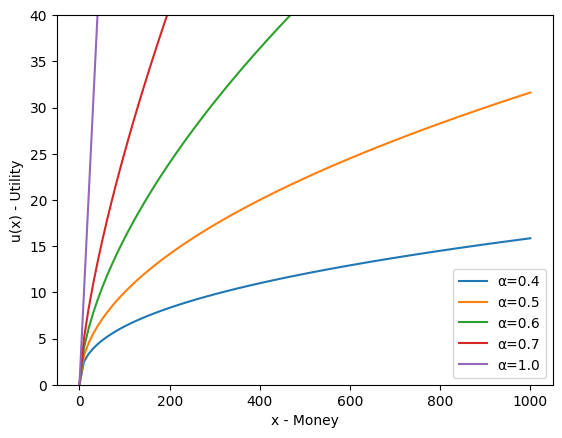

In [144]:
plot_utility_curves()

Let's now convert our outcomes to utilities. That is, we convert the objective outcomes to the quanities our minds might use to represent them. We'll use an $\alpha$ value of $0.8$ for now.

- **EXERCISE:** Fill in the blanks:

In [145]:
# Fill in the blanks:

A2_utils = power_function(1000, alpha=0.8)
B2_utils = power_function(450, alpha=0.8)

Notice that the values have now been transformed from:

In [146]:
print(A2_outcomes)
print(B2_outcomes)

[1000.    0.]
[450.]


to:

In [147]:
print(A2_utils)
print(B2_utils)

251.1886431509581
132.60808731637425


Notice that $1000 is now worth ~251 utility, and $450 is now worth ~133 utility.

The first implication is that $1000 is still worth more than $450 (because 251 is greater than 133), which makes logical sense. Let's see if there are any other consequences.

Now that we've converted outcomes to utilities, when we compute expected value, we are **computing average** utility, called the **expected utility**: $$V(A) = \sum_{x_i\in A} u(x_i) p_i$$

Let's compute these expected utilities below.

- **EXERCISE:** Fill in the blanks:

In [148]:
# Fill in the blanks

EU_A2 = compute_expected_value(A2_utils, A2_probs)/2
EU_B2 = compute_expected_value(B2_utils, B2_probs)

print("Expected utility of A2:", EU_A2)
print("Expected utility of B2:", EU_B2)

Expected utility of A2: 125.59432157547904
Expected utility of B2: 132.60808731637425


In [149]:
# TEST YOUR SOLUTION
if np.isclose(EU_A2, 125.59432157547904) and np.isclose(EU_B2, 132.60808731637425):
    print('Test passed')
else:
    print('Test failed')

Test passed


Let's remind ourselves what this means.

We started with the choice problem:

| Gamble A | Gamble B |
|-|-|
| <span style="color:blue">50%</span> chance of <span style="color:green">$1,000</span> <br> <span style="color:blue">50%</span> chance of <span style="color:green">$0</span> | <span style="color:blue">100%</span> chance of <span style="color:green">$450</span> |

People tend to choose gamble B, even though gamble A pays out more on average ($500 vs $450).

When we transform money into utility, we get 0.5 * 251 = 126 for gamble A, and 1.0 * 133 = 133 for gamble B. That is, **the value of gamble B is now greater than the value of gamble A!**

Let's verify.

- **EXERCISE:** Fill in the blanks:

In [150]:
# Fill in the blanks

decide_between_A_and_B(EU_A2, EU_B2)

'B'

In [151]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if decide_between_A_and_B(EU_A2, EU_B2) == 'B':
    print('Test passed')
else:
    print('Test failed')

Test passed


Thus a model that transforms money into "happiness points" (utilities) is one way to **account for why people choose gamble B over gamble A** despite the latter paying out more on average.

### Why does this work?

Let's think a little more about why this happens. Imagine a slightly different problem:

| Gamble A | Gamble B |
|-|-|
| <span style="color:blue">50%</span> chance of <span style="color:green">$1,000</span> <br> <span style="color:blue">50%</span> chance of <span style="color:green">$0</span> | <span style="color:blue">100%</span> chance of <span style="color:green">$500</span> |

The only difference now is that gamble B awards $500. Now the expected values (not utilities) are exactly equal. That is, 1000 * .5 (gamble A) = 500 * 1 (gamble B). In words, you can either get $500 every time, or get $1000 half of the time.

In this case, a model based on expected value assumes that people will find the gambles equally attractive. However, empirically, just like the previous problem, most people clearly favor B.

To understand how this is possible, think of the $1000 has having two halves. The first half ($500) is worth just as much **utility** as the outcome of B. That is, both are worth $u(\$500)$. 

Let's compute this utility:

In [152]:
power_function(500, alpha=0.8)

144.2699905907214

The utility of $500, $u(\$500)$, is ~144.

Now let's compute the utility of $1000:

In [153]:
power_function(1000, alpha=0.8)

251.1886431509581

The utility of $1000, $u(\$1000)$, is ~251.

Now, when we multiply this utility by .5 (50% chance), we get:

In [154]:
power_function(1000, alpha=0.8) / 2

125.59432157547904

125 is less than 144. That is, $u(\$500) > 0.5 \times u(\$1000)$.

This is because the "second half" of the $1000 is "worth less" in utility points than the first. This is the diminishing marginal utility of money at work.

### From gains to losses

So far we've only considered choices between options where the outcomes are positive. What about cases where we stand to lose money?

Consider the following choice problem:

| Gamble A | Gamble B |
|-|-|
| <span style="color:blue">50%</span> chance of <span style="color:green">-$100</span> <br> <span style="color:blue">50%</span> chance of <span style="color:green">$100</span> | <span style="color:blue">100%</span> chance of <span style="color:green">$0</span> |

In the first gamble, we have the chance to win $100, but we could also lose $100. The other option is that we could just take $0 with certainty, in which case we can't lose, but we also can't win.

**Expected value predicts that people will be indifferent**, because both gambles average out to 0.

**However, most people have a strong preference for gamble B**.

Can expected utility do any better?

We can easily extend our utility function to the loss domain by assuming that the utililty of a loss is just negative utility of what we'd get for a gain of the same size: $u(-x) = -u(x)$. That is, more money increases utility, and less money decreases utility.

We can implement this by redefining our utility function to be $u(x) = \text{sign}(x) \times |x|^\alpha$.

- **EXERCISE:** Create a function called `power_function_with_losses` that implements the above utility function.

In [157]:
# Your code here

def power_function_with_losses(x, alpha):
    return np.sign(x) * np.pow(np.abs(x), alpha)

In [158]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(power_function_with_losses(-0.5, alpha=0.5), -0.7071067811865476):
    print('Test passed')
else:
    print('Test failed')

Test passed


We can visualize this more general utility function below:

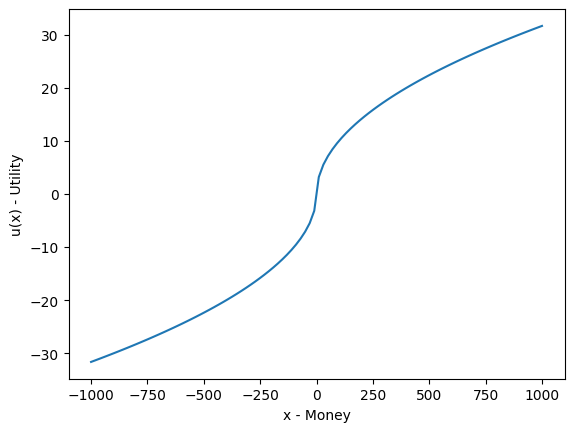

In [159]:
plot_utility_curve_with_losses()

Let's apply this function and see what happens.

For gamble B, $u(0) = 0$. Nothing happens there.

For gamble A, we have possible outcomes 100 and -100.

Let's see what their utility values are.

- **EXERCISE:** Fill in the blanks:

In [160]:
# Fill in the blanks

utility_of_gain = power_function_with_losses(100, 0.8)
utility_of_loss = power_function_with_losses(-100, 0.8)

print(utility_of_gain)
print(utility_of_loss)

39.810717055349734
-39.810717055349734


In [161]:
# TEST YOUR SOLUTION

if np.isclose(utility_of_gain + utility_of_loss, 0.0):
    print('Test passed')
else:
    print('Test failed')

Test passed


Their utilities have equal magnitudes (39 and -39), and thus their average is still 0.

Thus, the averages for both gambles are still 0, which again predicts indifference.

This means that **expected utility does not explain human behavior for this choice problem**, since we know that people are not indifferent.

Let's verify this.

- **EXERCISE:** Fill in the blanks:

In [162]:
# Fill in the blanks

A3_outcomes = np.array([-100., 100])
A3_probs = np.array([0.5, 0.5])

B3_outcomes = np.array([0.])
B3_probs = np.array([1])

A3_utils = power_function_with_losses(A3_outcomes, alpha=0.8)
B3_utils = power_function_with_losses(B3_outcomes, alpha=0.8)

EU_A3 = compute_expected_value(A3_utils, A3_probs)
EU_B3 = compute_expected_value(B3_utils, B3_probs)

decide_between_A_and_B(EU_A3, EU_B3)

'Indifferent'

In [163]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if decide_between_A_and_B(EU_A3, EU_B3) == 'Indifferent':
    print('Test passed')
else:
    print('Test failed')

Test passed


Again, let's try to think about how this is possible. The only difference in this new problem is that it involves a loss, which people seem to be avoiding. 

This is called **loss aversion**. It was one of the discovered behaviors that led Daniel Kahneman and Amos Tversky in 2002 to become the first psychologists to win a Nobel Prize.

Kahneman and Tversky proposed that, to people, "losses loom larger than gains". That is, we feel more upset about a loss of $100 than we feel good about a gain of $100.

Thus, maybe $u(\$100)$ provides say 50 utility points, whereas $u(\-$100)$ provides -80 utility points. Such behavior requires an **asymmetric** utility function that treats losses different than gains. We will explore this idea in a later assignment.

Importantly, a model incorporating the above could explain people's behavior. That is, the loss (-$100) could drag down the total utility for gamble A to a value below 0, and thus gamble B would be preferred.

While explaining losses would be an improvement, it still doesn't give us a perfect model. For example, just as people seem to treat money values subjectively, they also treat probability values subjectively. Moreover, there is a large and growing list of choice anomalies that researchers are still exploring. A full explanation of how the mind makes decisions under risk will require explaining of peoples' many biases.